<a href="https://colab.research.google.com/github/Emanuel-Acosta/challege-telecom-X2/blob/main/challenge_telecom_X2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TelecomX Parte 2

In [53]:
import pandas as pd

# URL del archivo CSV en formato RAW
url = 'https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/df_telecomx1.csv'

# Leer el archivo CSV desde GitHub
df_telecomx1 = pd.read_csv(url)

df_telecomx1.head()

ID_Cliente Cancelacion  Genero  Adulto_Mayor Tiene_Pareja  \
0  0002-ORFBO          no  Female             0          yes   
1  0003-MKNFE          no    Male             0           no   
2  0004-TLHLJ         yes    Male             0           no   
3  0011-IGKFF         yes    Male             1          yes   
4  0013-EXCHZ         yes  Female             1          yes   

  Tiene_Dependientes  Meses_Contrato Suscripcion_Servicio_Telefono  \
0                yes               9                           yes   
1                 no               9                           yes   
2                 no               4                           yes   
3                 no              13                           yes   
4                 no               3                           yes   

  Suscripcion_Multiples_Lineas Suscripcion_Servicio_Internet  ...  \
0                           no                           DSL  ...   
1                          yes                           DSL  ...   
2                           no                   Fiber optic  ...   
3                           no                   Fiber optic  ...   
4                           no                   Fiber optic  ...   

  Suscripcion_Proteccion_Dispositivo Suscripcion_Soporte_T√©cnico  \
0                                 no                         yes   
1                                 no                          no   
2                                yes                          no   
3                                yes                          no   
4                                 no                         yes   

  Suscripcion_TV_Streaming Suscripcion_Pel√≠culas_Streaming   Tipo_Contrato  \
0                      yes                              no        One year   
1                       no                             yes  Month-to-month   
2                       no                              no  Month-to-month   
3                      yes                             yes  Month-to-month   
4                      yes                              no  Month-to-month   

  Factura_Electronica       Metodo_Pago Factura_Mensual Cargos_Totales  \
0                 yes      Mailed check            65.6         593.30   
1                  no      Mailed check            59.9         542.40   
2                 yes  Electronic check            73.9         280.85   
3                 yes  Electronic check            98.0        1237.85   
4                 yes      Mailed check            83.9         267.40   

   Cuentas_diarias  
0              2.2  
1              2.0  
2              2.5  
3              3.3  
4              2.8  

[5 rows x 22 columns]

## Limpieza y Transformaci√≥n de Datos para Machine Learning y one-hot encoding.

### Eliminar columnas irrelevantes




In [54]:
df_telecomx1.drop(columns=['ID_Cliente'], inplace=True)

### Convertir la variable objetivo (Cancelaci√≥n) a num√©rica
Est√° en formato 'yes' / 'no', as√≠ que conviene convertirla a 1 (s√≠ cancel√≥) y 0 (no cancel√≥).

In [55]:
df_telecomx1['Cancelacion'] = df_telecomx1['Cancelacion'].map({'yes': 1, 'no': 0})

### Codificar variables categ√≥ricas binarias
Estas variables est√°n en formato 'yes' / 'no'. Conviene convertirlas a 1/0:

In [56]:
# Encuentra columnas con yes/no
binarias = df_telecomx1.columns[df_telecomx1.isin(['yes', 'no']).any()]

# Convierte yes/no a 1/0
df_telecomx1[binarias] = df_telecomx1[binarias].apply(lambda x: x.map({'yes': 1, 'no': 0}))


In [57]:
# Limpiar espacios y convertir a min√∫sculas
df_telecomx1['Suscripcion_Seguridad_En_Linea'] = df_telecomx1['Suscripcion_Seguridad_En_Linea'].str.strip().str.lower()

# Mapear valores a 1 y 0
df_telecomx1['Suscripcion_Seguridad_En_Linea'] = df_telecomx1['Suscripcion_Seguridad_En_Linea'].replace({
    'yes': 1,
    'no': 0,
    'no internet service': 0
})

/tmp/ipython-input-174670821.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecomx1['Suscripcion_Seguridad_En_Linea'] = df_telecomx1['Suscripcion_Seguridad_En_Linea'].replace({


In [58]:
df_telecomx1.head()

Cancelacion  Genero  Adulto_Mayor  Tiene_Pareja  Tiene_Dependientes  \
0            0  Female             0             1                   1   
1            0    Male             0             0                   0   
2            1    Male             0             0                   0   
3            1    Male             1             1                   0   
4            1  Female             1             1                   0   

   Meses_Contrato  Suscripcion_Servicio_Telefono  \
0               9                              1   
1               9                              1   
2               4                              1   
3              13                              1   
4               3                              1   

   Suscripcion_Multiples_Lineas Suscripcion_Servicio_Internet  \
0                             0                           DSL   
1                             1                           DSL   
2                             0                   Fiber optic   
3                             0                   Fiber optic   
4                             0                   Fiber optic   

   Suscripcion_Seguridad_En_Linea  ...  Suscripcion_Proteccion_Dispositivo  \
0                               0  ...                                 0.0   
1                               0  ...                                 0.0   
2                               0  ...                                 1.0   
3                               0  ...                                 1.0   
4                               0  ...                                 0.0   

   Suscripcion_Soporte_T√©cnico  Suscripcion_TV_Streaming  \
0                          1.0                       1.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       1.0   
4                          1.0                       1.0   

   Suscripcion_Pel√≠culas_Streaming   Tipo_Contrato Factura_Electronica  \
0                              0.0        One year                   1   
1                              1.0  Month-to-month                   0   
2                              0.0  Month-to-month                   1   
3                              1.0  Month-to-month                   1   
4                              0.0  Month-to-month                   1   

        Metodo_Pago Factura_Mensual  Cargos_Totales  Cuentas_diarias  
0      Mailed check            65.6          593.30              2.2  
1      Mailed check            59.9          542.40              2.0  
2  Electronic check            73.9          280.85              2.5  
3  Electronic check            98.0         1237.85              3.3  
4      Mailed check            83.9          267.40              2.8  

[5 rows x 21 columns]

### Codificar g√©nero
Genero: 'Male' y 'Female'.
Puedes convertirlo en binario (por ejemplo, Male = 1, Female = 0):

In [59]:
df_telecomx1['Genero'] = df_telecomx1['Genero'].map({'Male': 1, 'Female': 0})

### Codificar variables categ√≥ricas NO binarias
Estas no son 'yes/no' y deben convertirse con one-hot encoding (dummies):

Tipo_Contrato: 'Month-to-month', 'One year', 'Two year'

Metodo_Pago: 'Mailed check', 'Electronic check', etc.

Suscripcion_Servicio_Internet: 'DSL', 'Fiber optic', 'No'

In [60]:
df_telecomx1 = pd.get_dummies(df_telecomx1, columns=['Tipo_Contrato', 'Metodo_Pago', 'Suscripcion_Servicio_Internet'], drop_first=True)

In [61]:
df_telecomx1.head()

Cancelacion  Genero  Adulto_Mayor  Tiene_Pareja  Tiene_Dependientes  \
0            0       0             0             1                   1   
1            0       1             0             0                   0   
2            1       1             0             0                   0   
3            1       1             1             1                   0   
4            1       0             1             1                   0   

   Meses_Contrato  Suscripcion_Servicio_Telefono  \
0               9                              1   
1               9                              1   
2               4                              1   
3              13                              1   
4               3                              1   

   Suscripcion_Multiples_Lineas  Suscripcion_Seguridad_En_Linea  \
0                             0                               0   
1                             1                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   Suscripcion_Respaldo_En_Linea  ...  Factura_Mensual  Cargos_Totales  \
0                            1.0  ...             65.6          593.30   
1                            0.0  ...             59.9          542.40   
2                            0.0  ...             73.9          280.85   
3                            1.0  ...             98.0         1237.85   
4                            0.0  ...             83.9          267.40   

   Cuentas_diarias  Tipo_Contrato_One year  Tipo_Contrato_Two year  \
0              2.2                    True                   False   
1              2.0                   False                   False   
2              2.5                   False                   False   
3              3.3                   False                   False   
4              2.8                   False                   False   

   Metodo_Pago_Credit card (automatic)  Metodo_Pago_Electronic check  \
0                                False                         False   
1                                False                         False   
2                                False                          True   
3                                False                          True   
4                                False                         False   

   Metodo_Pago_Mailed check  Suscripcion_Servicio_Internet_Fiber optic  \
0                      True                                      False   
1                      True                                      False   
2                     False                                       True   
3                     False                                       True   
4                      True                                       True   

   Suscripcion_Servicio_Internet_No  
0                             False  
1                             False  
2                             False  
3                             False  
4                             False  

[5 rows x 25 columns]

### Revisar nulos y valores at√≠picos

In [62]:
print(df_telecomx1.isnull().sum())


Cancelacion                                     0
Genero                                          0
Adulto_Mayor                                    0
Tiene_Pareja                                    0
Tiene_Dependientes                              0
Meses_Contrato                                  0
Suscripcion_Servicio_Telefono                   0
Suscripcion_Multiples_Lineas                    0
Suscripcion_Seguridad_En_Linea                  0
Suscripcion_Respaldo_En_Linea                1526
Suscripcion_Proteccion_Dispositivo           1526
Suscripcion_Soporte_T√©cnico                  1526
Suscripcion_TV_Streaming                     1526
Suscripcion_Pel√≠culas_Streaming              1526
Factura_Electronica                             0
Factura_Mensual                                 0
Cargos_Totales                                  0
Cuentas_diarias                                 0
Tipo_Contrato_One year                          0
Tipo_Contrato_Two year                          

In [63]:
columnas_con_nulos = [
    'Suscripcion_Respaldo_En_Linea',
    'Suscripcion_Proteccion_Dispositivo',
    'Suscripcion_Soporte_T√©cnico',
    'Suscripcion_TV_Streaming',
    'Suscripcion_Pel√≠culas_Streaming'
]

# Llenar nulos con 0
df_telecomx1[columnas_con_nulos] = df_telecomx1[columnas_con_nulos].fillna(0)

In [64]:
df_telecomx1[columnas_con_nulos].isnull().sum()

Suscripcion_Respaldo_En_Linea         0
Suscripcion_Proteccion_Dispositivo    0
Suscripcion_Soporte_T√©cnico           0
Suscripcion_TV_Streaming              0
Suscripcion_Pel√≠culas_Streaming       0
dtype: int64

In [65]:
print(df_telecomx1.columns.tolist())

['Cancelacion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Suscripcion_Servicio_Telefono', 'Suscripcion_Multiples_Lineas', 'Suscripcion_Seguridad_En_Linea', 'Suscripcion_Respaldo_En_Linea', 'Suscripcion_Proteccion_Dispositivo', 'Suscripcion_Soporte_T√©cnico', 'Suscripcion_TV_Streaming', 'Suscripcion_Pel√≠culas_Streaming', 'Factura_Electronica', 'Factura_Mensual', 'Cargos_Totales', 'Cuentas_diarias', 'Tipo_Contrato_One year', 'Tipo_Contrato_Two year', 'Metodo_Pago_Credit card (automatic)', 'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check', 'Suscripcion_Servicio_Internet_Fiber optic', 'Suscripcion_Servicio_Internet_No']


## Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)

In [66]:
# Contar valores √∫nicos en la columna 'Cancelacion'
conteo = df_telecomx1['Cancelacion'].value_counts()

print(conteo)

# Calcular proporci√≥n de cada clase
proporcion = df_telecomx1['Cancelacion'].value_counts(normalize=True)

print(proporcion)


Cancelacion
0    5174
1    1869
Name: count, dtype: int64
Cancelacion
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [67]:
import matplotlib.pyplot as plt

plt.bar(df_telecomx1['Cancelacion'].value_counts().index, df_telecomx1['Cancelacion'].value_counts())
plt.title("Distribuci√≥n de la variable Cancelacion")
plt.ylabel("Frecuencia")
plt.xlabel("Cancelacion")
plt.xticks(df_telecomx1['Cancelacion'].value_counts().index)
plt.show()


Se puede observar que existe un asimetria entre los clientes que se quedan y se van. Esto puede afectar al modelo de clasificacion al momento de entrenar el mismo y como puede luego generalizar. En pasos posteriores modificare esta "asimetria" con tecnicas de muestreo como el oversampling y la funcion SMOTE.

## Normalizaci√≥n (StandardScaler)
Necesario si vas a usar modelos basados en:

KNN

Regresi√≥n log√≠stica

SVM

Redes neuronales

In [68]:
from sklearn.preprocessing import StandardScaler

columnas_a_escalar = ['Factura_Mensual', 'Cargos_Totales', 'Cuentas_diarias', 'Meses_Contrato']
scaler = StandardScaler()
df_telecomx1[columnas_a_escalar] = scaler.fit_transform(df_telecomx1[columnas_a_escalar])


## Visualizaci√≥n de Correlaciones


Gr√°fico de matriz de correlaci√≥n (heatmap):

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
sns.heatmap(df_telecomx1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaci√≥n de todas las variables (incluyendo Cancelacion o Churn)')
plt.show()

La matriz de correlaci√≥n muestra la relaci√≥n entre variables num√©ricas. Se observa que la cancelaci√≥n se asocia positivamente con clientes que usan fibra √≥ptica, pago electr√≥nico y tienen mayor gasto mensual. En cambio, contratos largos y servicios adicionales como soporte t√©cnico se vinculan con menor probabilidad de cancelaci√≥n.

## An√°lisis de Variables Clave contra Cancelaci√≥n
1. Gasto total vs Cancelaci√≥n (Boxplot)

In [70]:
sns.boxplot(x='Cancelacion', y='Cargos_Totales', data=df_telecomx1)
plt.title("Cargos Totales vs Cancelacion")
plt.show()

Aunque hay solapamiento, los clientes que no cancelan suelen tener cargos totales m√°s altos, probablemente porque llevan m√°s tiempo activos. Esto refuerza la relaci√≥n entre antig√ºedad y permanencia.

2. Meses de contrato vs Cancelaci√≥n (Boxplot)

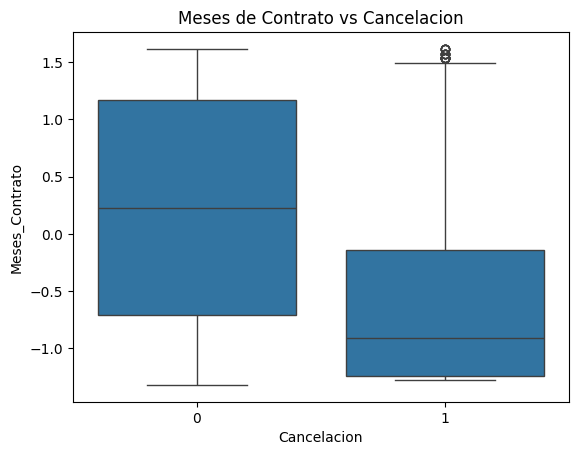

In [71]:
sns.boxplot(x='Cancelacion', y='Meses_Contrato', data=df_telecomx1)
plt.title("Meses de Contrato vs Cancelacion")
plt.show()

Los clientes que cancelan tienden a tener significativamente menos meses de contrato que los que permanecen. Esto sugiere que la permanencia est√° relacionada con mayor antig√ºedad en el servicio.

## Divisi√≥n de Datos: Entrenamiento y Prueba
¬øPor qu√©?
Separar los datos evita que el modelo se entrene y eval√∫e con la misma informaci√≥n, lo que ayuda a medir su capacidad de generalizaci√≥n.

In [72]:
from sklearn.model_selection import train_test_split

X = df_telecomx1.drop('Cancelacion', axis=1)  # Variables predictoras
y = df_telecomx1['Cancelacion']               # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Balanceo de Clases con SMOTE
¬øPor qu√©?
Tu dataset tiene una clase minoritaria (clientes que cancelan). SMOTE genera ejemplos sint√©ticos para equilibrar las clases y evitar que el modelo se sesgue.

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar nueva proporci√≥n
print(y_train_smote.value_counts())


Cancelacion
0    4139
1    4139
Name: count, dtype: int64


In [74]:
import matplotlib.pyplot as plt

# Distribuci√≥n original
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
y_train.value_counts().plot(kind='bar', title='Distribuci√≥n original en entrenamiento')

# Distribuci√≥n tras SMOTE
plt.subplot(1,2,2)
y_train_smote.value_counts().plot(kind='bar', title='Distribuci√≥n tras SMOTE')
plt.show()


El gr√°fico muestra que originalmente hay un desbalance importante entre clientes que no cancelan y los que s√≠. Tras aplicar SMOTE, las clases quedan equilibradas, lo que ayuda a que los modelos aprendan de manera justa y no se sesguen hacia la clase mayoritaria.

## Entrenamiento de Modelos


### Modelo 1: Regresi√≥n Log√≠stica (requiere normalizaci√≥n)
¬øPor qu√©?
Es un modelo interpretable, sensible a la escala de los datos. √ötil como l√≠nea base.

In [75]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression()
modelo_log.fit(X_train_smote, y_train_smote)
y_pred_log = modelo_log.predict(X_test)


In [76]:
coef = pd.Series(modelo_log.coef_[0], index=X_train.columns)
coef = coef.sort_values()

plt.figure(figsize=(10,6))
coef.plot(kind='barh')
plt.title('Coeficientes de variables en Regresi√≥n Log√≠stica')
plt.show()

Los coeficientes indican el efecto de cada variable sobre la probabilidad de cancelaci√≥n: valores positivos aumentan la probabilidad, y negativos la disminuyen. Esto permite interpretar el sentido y fuerza de cada factor en la decisi√≥n del cliente.

### Modelo 2: Random Forest (no requiere normalizaci√≥n)
¬øPor qu√©?
Es robusto, maneja bien datos desbalanceados, no necesita escalar, y suele tener buen rendimiento sin mucho ajuste.

In [77]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

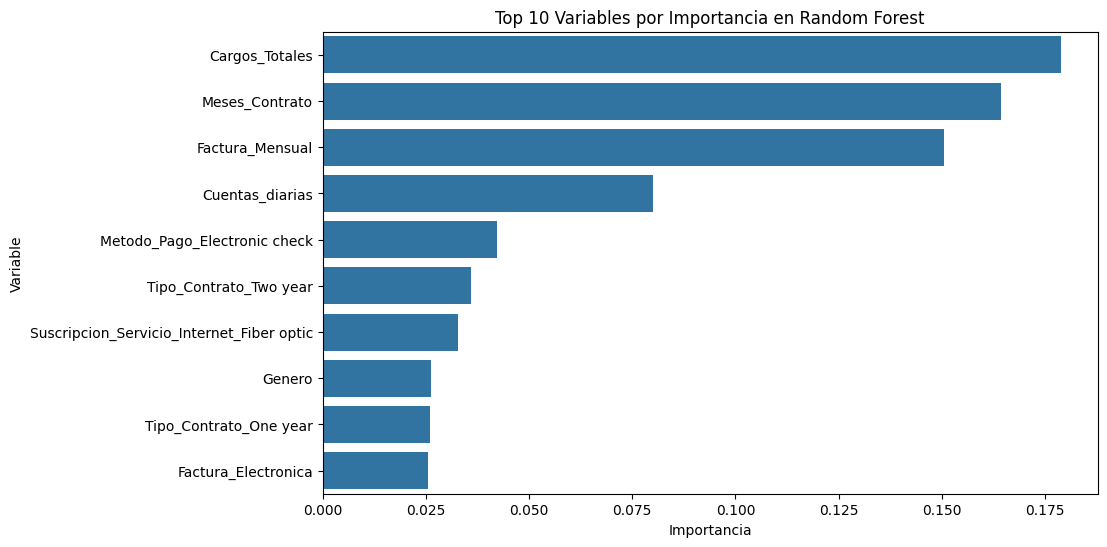

In [78]:
importances = modelo_rf.feature_importances_
feat_names = X_train.columns

df_importance = pd.DataFrame({'Variable': feat_names, 'Importancia': importances})
df_importance = df_importance.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=df_importance.head(10), x='Importancia', y='Variable')
plt.title('Top 10 Variables por Importancia en Random Forest')
plt.show()

Este gr√°fico revela cu√°les variables tienen mayor impacto en la predicci√≥n de cancelaci√≥n seg√∫n el modelo Random Forest. Las variables con mayor importancia deber√≠an ser consideradas prioritarias para acciones de retenci√≥n.

## Evaluaci√≥n de Modelos
¬øPara qu√©?
Evaluar los modelos con m√©tricas cuantitativas (precisi√≥n, recall, F1-score) y visuales (matriz de confusi√≥n) nos permite entender qu√© tan bien predicen la cancelaci√≥n, identificar errores y comparar cu√°l modelo es mejor.

Reporte Regresi√≥n Log√≠stica:

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409



Reporte Random Forest:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409



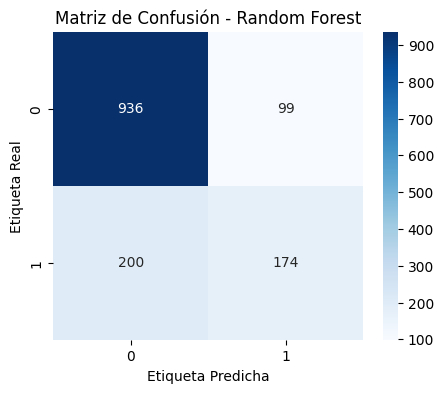

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Funci√≥n para graficar matriz de confusi√≥n
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

# Evaluar Regresi√≥n Log√≠stica
print("Reporte Regresi√≥n Log√≠stica:\n")
print(classification_report(y_test, y_pred_log))
plot_confusion_matrix(y_test, y_pred_log, "Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")

# Evaluar Random Forest
print("Reporte Random Forest:\n")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Matriz de Confusi√≥n - Random Forest")


Regresi√≥n Log√≠stica:

Mejor recall para la clase 1 (cancelaci√≥n), 0.77, es decir, detecta bien a quienes cancelan (menos falsos negativos).

Precisi√≥n menor para clase 1 (0.52), indica m√°s falsos positivos (predice cancelaci√≥n cuando no es as√≠).

Accuracy general es 75%.

Random Forest:

Mejor precisi√≥n para clase 0 (no cancelan), 0.82, y accuracy m√°s alta (79%).

Recall para clase 1 m√°s bajo (0.47), es decir, pierde m√°s clientes que cancelan (m√°s falsos negativos).

F1-score para clase 1 tambi√©n menor (0.54), peor en detectar cancelaciones.

## Interpretaci√≥n de la importancia de variables
Despu√©s de evaluar los modelos con m√©tricas (exactitud, precisi√≥n, recall, F1, matriz de confusi√≥n), el siguiente paso es entender qu√© variables son las m√°s influyentes en la predicci√≥n de la cancelaci√≥n seg√∫n cada modelo.

### 1 Regresi√≥n Log√≠stica: Coeficientes
¬øQu√© hacemos?
Extraemos los coeficientes del modelo para identificar qu√© variables aumentan o disminuyen la probabilidad de cancelaci√≥n.

Coeficiente positivo ‚Üí mayor probabilidad de cancelar.

Coeficiente negativo ‚Üí menor probabilidad de cancelar.

La magnitud indica fuerza del efecto.

In [80]:
# Obtener los nombres de las variables predictoras
features = df_telecomx1.drop(columns=['Cancelacion']).columns

# Extraer los coeficientes del modelo entrenado
coef = modelo_log.coef_[0]

# Crear un DataFrame con los resultados
coef_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': coef
})

# Agregar columna de magnitud absoluta para ordenarlas
coef_df['Importancia Absoluta'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importancia Absoluta', ascending=False)

# Mostrar los coeficientes ordenados
print("Coeficientes de Regresi√≥n Log√≠stica:")
display(coef_df)


Coeficientes de Regresi√≥n Log√≠stica:


Variable  Coeficiente  \
14                            Factura_Mensual     1.772291   
5               Suscripcion_Servicio_Telefono    -1.537167   
4                              Meses_Contrato    -1.376417   
20               Metodo_Pago_Electronic check     1.049380   
18                     Tipo_Contrato_Two year    -1.015435   
7              Suscripcion_Seguridad_En_Linea    -0.963459   
10                Suscripcion_Soporte_T√©cnico    -0.776705   
15                             Cargos_Totales     0.748000   
21                   Metodo_Pago_Mailed check     0.598314   
19        Metodo_Pago_Credit card (automatic)     0.547711   
3                          Tiene_Dependientes    -0.495298   
17                     Tipo_Contrato_One year    -0.428705   
8               Suscripcion_Respaldo_En_Linea    -0.423134   
22  Suscripcion_Servicio_Internet_Fiber optic    -0.410671   
12            Suscripcion_Pel√≠culas_Streaming    -0.355537   
11                   Suscripcion_TV_Streaming    -0.334323   
16                            Cuentas_diarias    -0.321209   
9          Suscripcion_Proteccion_Dispositivo    -0.297933   
0                                      Genero    -0.281446   
23           Suscripcion_Servicio_Internet_No     0.245251   
13                        Factura_Electronica     0.215896   
2                                Tiene_Pareja    -0.185400   
6                Suscripcion_Multiples_Lineas    -0.159994   
1                                Adulto_Mayor    -0.133250   

    Importancia Absoluta  
14              1.772291  
5               1.537167  
4               1.376417  
20              1.049380  
18              1.015435  
7               0.963459  
10              0.776705  
15              0.748000  
21              0.598314  
19              0.547711  
3               0.495298  
17              0.428705  
8               0.423134  
22              0.410671  
12              0.355537  
11              0.334323  
16              0.321209  
9               0.297933  
0               0.281446  
23              0.245251  
13              0.215896  
2               0.185400  
6               0.159994  
1               0.133250

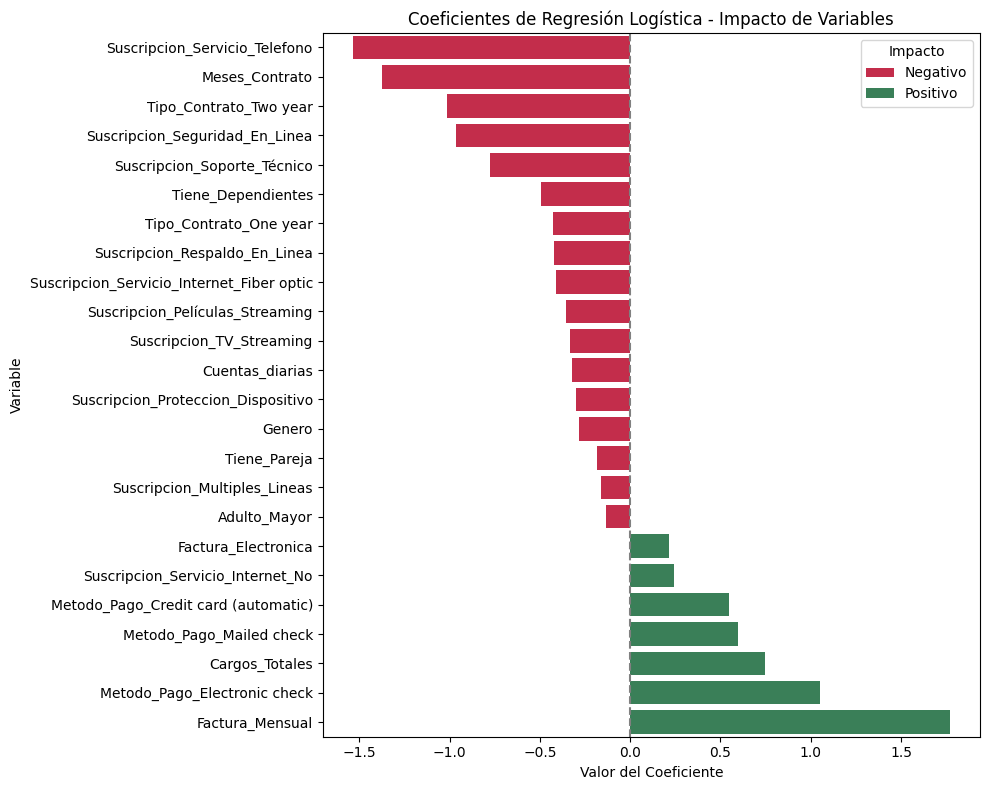

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una copia del DataFrame de coeficientes
coef_plot_df = coef_df.copy()

# A√±adir columna para clasificar el tipo de impacto
coef_plot_df['Impacto'] = coef_plot_df['Coeficiente'].apply(lambda x: 'Positivo' if x > 0 else 'Negativo')

# Ordenar por la magnitud del coeficiente
coef_plot_df = coef_plot_df.sort_values(by='Coeficiente', ascending=True)

# Crear gr√°fico de barras horizontales
plt.figure(figsize=(10, 8))
sns.barplot(
    data=coef_plot_df,
    x='Coeficiente',
    y='Variable',
    hue='Impacto',
    dodge=False,
    palette={'Positivo': 'seagreen', 'Negativo': 'crimson'}
)

plt.axvline(0, color='gray', linestyle='--')
plt.title('Coeficientes de Regresi√≥n Log√≠stica - Impacto de Variables')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variable')
plt.legend(title='Impacto')
plt.tight_layout()
plt.show()


Los coeficientes indican cu√°nto influye cada variable en la probabilidad de cancelaci√≥n. Las variables con coeficientes positivos, como Factura Mensual y Pago con Electronic Check, aumentan la probabilidad de cancelaci√≥n. En cambio, variables como Meses de Contrato, Servicio Telef√≥nico o Soporte T√©cnico tienen coeficientes negativos, indicando que reducen la probabilidad de cancelaci√≥n.

La magnitud del coeficiente refleja la fuerza del impacto: por ejemplo, Factura Mensual tiene el mayor coeficiente absoluto, por lo tanto, es una de las variables m√°s influyentes en el modelo.

### Random Forest Importancia de Variables

/tmp/ipython-input-3957205416.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


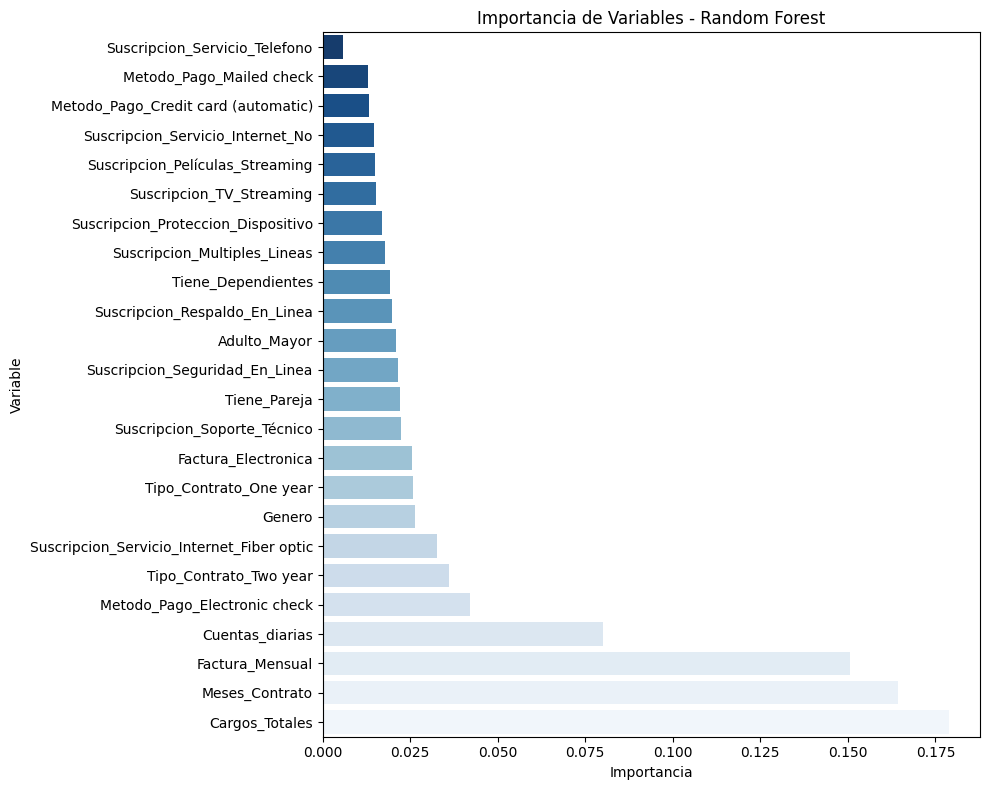

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con la importancia de las variables
importancia_rf_df = pd.DataFrame({
    'Variable': features,
    'Importancia': modelo_rf.feature_importances_
})

# Ordenar por importancia descendente
importancia_rf_df = importancia_rf_df.sort_values(by='Importancia', ascending=True)

# Gr√°fico de barras horizontales
plt.figure(figsize=(10, 8))
sns.barplot(
    data=importancia_rf_df,
    x='Importancia',
    y='Variable',
    palette='Blues_r'
)

plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


El modelo Random Forest identifica las variables que m√°s contribuyen a tomar decisiones en la predicci√≥n de cancelaci√≥n. Entre las m√°s importantes destacan Meses de Contrato, Cargos Totales y Factura Mensual, lo que indica que el comportamiento financiero y la duraci√≥n del contrato son factores clave. Estas variables ayudaron al modelo a separar con mayor precisi√≥n a los clientes que cancelan de los que no.

El gr√°fico muestra c√≥mo estas variables tienen mayor peso en la toma de decisiones dentro del modelo, y por tanto son prioritarias para estrategias de retenci√≥n.

# Informe Final

## 1. Carga y limpieza de datos
Se carg√≥ el archivo CSV directamente desde GitHub mediante pandas



```
url = 'https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/df_telecomx1.csv'
df_telecomx1 = pd.read_csv(url)
```



### Limpieza inicial

Se eliminaron columnas irrelevantes como ID_Cliente.

Se transformaron valores categ√≥ricos de yes/no a 1/0.

Se verificaron y trataron valores nulos en algunas columnas de servicios.

Se aplic√≥ codificaci√≥n One-Hot para variables categ√≥ricas.

## 2. Exploracion de datos

### Distribuci√≥n de la variable objetivo
Se analiz√≥ la variable Cancelacion



```
 df_telecomx1['Cancelacion'].value_counts(normalize=True)
```



Resultado:

Clientes que permanecen: 73.46%

Clientes que cancelan: 26.54%

üìâ Esto muestra un desbalance moderado entre clases, lo que motiv√≥ el uso de t√©cnicas de balanceo.



![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/1_distribucion_cancelacion.png)


Se observ√≥ una clara asimetr√≠a que podr√≠a afectar el entrenamiento del modelo. Se utilizaron t√©cnicas como SMOTE para compensar esta diferencia.

## 3. Normalizaci√≥n
Se aplic√≥ normalizaci√≥n con StandardScaler para variables utilizadas en modelos basados en distancia (como regresi√≥n log√≠stica):



```
from sklearn.preprocessing import StandardScaler

columnas_a_escalar = ['Factura_Mensual', 'Cargos_Totales', 'Cuentas_diarias', 'Meses_Contrato']
scaler = StandardScaler()
df_telecomx1[columnas_a_escalar] = scaler.fit_transform(df_telecomx1[columnas_a_escalar])
```



## 4. Correlaci√≥n de Variables
Se construy√≥ una matriz de correlaci√≥n para detectar variables num√©ricas relevantes:

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/2_matriz_correlacion.png)

---

Las variables con mayor correlaci√≥n con Cancelacion fueron:

Meses_Contrato (‚àí0.35)

Tipo_Contrato_Two year (‚àí0.30)

Metodo_Pago_Electronic check (+0.30)

La duraci√≥n del contrato y el tipo de pago influyen fuertemente en la cancelaci√≥n.

## 5. An√°lisis Gr√°fico de Variables Espec√≠ficas

### Meses de Contrato vs Cancelaci√≥n

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/4_boxplot_Meses_Contrato_vs_Cancelacion.png)

---

Los clientes que permanecen suelen tener m√°s tiempo de contrato.

### Cargos Totales vs Cancelaci√≥n

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/3_boxplot_Cargos_Totales_vs_Cancelacion.png)

---

Los clientes que cancelan tienden a tener facturaci√≥n acumulada m√°s baja.

## 6. Divisi√≥n del Conjunto de Datos
Se dividieron los datos en entrenamiento (80%) y prueba (20%):



```
from sklearn.model_selection import train_test_split

X = df_telecomx1.drop('Cancelacion', axis=1)
y = df_telecomx1['Cancelacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```



### Adem√°s, se aplic√≥ SMOTE para balancear la clase minoritaria:



```
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

```



![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/5_Distribucion_original_vs_SMOTE.png)

---

El gr√°fico muestra que originalmente hay un desbalance importante entre clientes que no cancelan y los que s√≠. Tras aplicar SMOTE, las clases quedan equilibradas, lo que ayuda a que los modelos aprendan de manera justa y no se sesguen hacia la clase mayoritaria.

## 7. Entrenamiento de Modelos

#### Modelo 1: Regresi√≥n Log√≠stica
 Coeficiente:

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/6_Coeficientes_Regresion_Logistica.png)

---

Los coeficientes indican el efecto de cada variable sobre la probabilidad de cancelaci√≥n: valores positivos aumentan la probabilidad, y negativos la disminuyen. Esto permite interpretar el sentido y fuerza de cada factor en la decisi√≥n del cliente.

#### Modelo 2: Random Forest

Importancia de Variables - Random Forest

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/7_Importancia_Variables_RandomForest.png)

---

Este gr√°fico revela cu√°les variables tienen mayor impacto en la predicci√≥n de cancelaci√≥n seg√∫n el modelo Random Forest. Las variables con mayor importancia deber√≠an ser consideradas prioritarias para acciones de retenci√≥n.

## 8. Evaluaci√≥n de Modelos

Se evaluaron con m√©tricas est√°ndar:

¬øPara qu√©? Evaluar los modelos con m√©tricas cuantitativas (precisi√≥n, recall, F1-score) y visuales (matriz de confusi√≥n) nos permite entender qu√© tan bien predicen la cancelaci√≥n, identificar errores y comparar cu√°l modelo es mejor.

Matrices de Confusi√≥n (L√≥gica y Random Forest)

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/8_Matrices_Confusion_Modelos.png)

Regresi√≥n Log√≠stica detecta mejor a los que cancelan (mayor recall).

Random Forest tiene mejor rendimiento general (accuracy).

## 9. Interpretaci√≥n de los Modelos


#### Coeficiente de regresi√≥n logistica

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/9_Coeficientes_Regresion_Logistica.png)


Los coeficientes m√°s importantes fueron:

Factura_Mensual: +1.77

Suscripcion_Servicio_Telefono: ‚àí1.53

Meses_Contrato: ‚àí1.37

Interpretaci√≥n: Las variables econ√≥micas y de contrato afectan directamente la cancelaci√≥n.

Se visualiz√≥ con un gr√°fico de barras ordenado por importancia.

#### Importancia en Random Forest

Se construy√≥ un gr√°fico de importancia de variables

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/10_Importancia_Variables_RandomForest.png)


Las variables m√°s importantes fueron:

- Meses_Contrato

- Cargos_Totales

- Factura_Mensual

## 10. Conclusi√≥n Estrat√©gica Final

Principales factores que influyen en la cancelaci√≥n:

- Contratos mensuales y de corta duraci√≥n.

- M√©todos de pago electr√≥nicos (mayor riesgo).

- Facturas mensuales altas y sin servicios adicionales activos.

- Estrategias de retenci√≥n recomendadas:

- Ofrecer descuentos o beneficios por contratos largos (1 o 2 a√±os).

- Incentivar el uso de servicios como soporte t√©cnico o respaldo en l√≠nea.

- Ofrecer planes personalizados para clientes con cargos altos o m√©todos de pago electr√≥nicos.



## 11. Recomendaciones Futuros Pasos

- Aplicar estos modelos en tiempo real para detectar clientes en riesgo.

- Usar nuevos datos (satisfacci√≥n, quejas, soporte) para enriquecer el an√°lisis.

- Refinar modelos con t√©cnicas de optimizaci√≥n y m√°s datos hist√≥ricos.